### Read in the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

### Clean the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datathon 2/datathon_data.csv')

In [ ]:
# replace blank space with -2
df.replace(' ', -2, inplace=True)
# convert data type to int (except for the first 3 cols)
for column in df.columns[3:]:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
    
# show data info
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 392 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    ID                      7737 non-null   int64  
 1    VARUNIT                 7737 non-null   int64  
 2    WEIGHT                  7737 non-null   float64
 3    Q1                      7737 non-null   Int64  
 4    Q2                      7737 non-null   Int64  
 5    Q3                      7737 non-null   Int64  
 6    Q5                      7737 non-null   Int64  
 7    Q5A                     7737 non-null   Int64  
 8    Q96B                    7737 non-null   Int64  
 9    Q97                     7737 non-null   Int64  
 10   Q97A                    7737 non-null   Int64  
 11   Q98                     7737 non-null   Int64  
 12   Q98A                    7737 non-null   Int64  
 13   Q78                     7737 non-null   Int64  
 14   Q78A                  

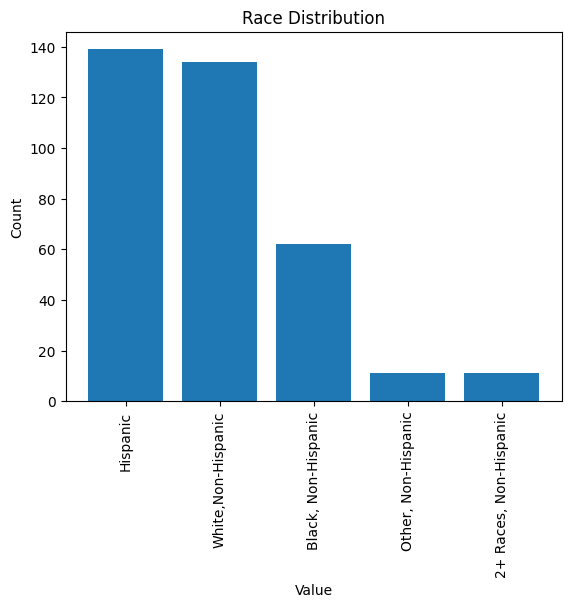

In [ ]:
counts = df['PPETHM'].value_counts()
counts = counts.rename({1:'White,Non-Hispanic', 2:'Black, Non-Hispanic', 3:'Other, Non-Hispanic',4: 'Hispanic', 5:'2+ Races, Non-Hispanic'})
plt.bar(counts.index, counts.values)
plt.title('Race Distribution')
plt.xlabel('Value')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

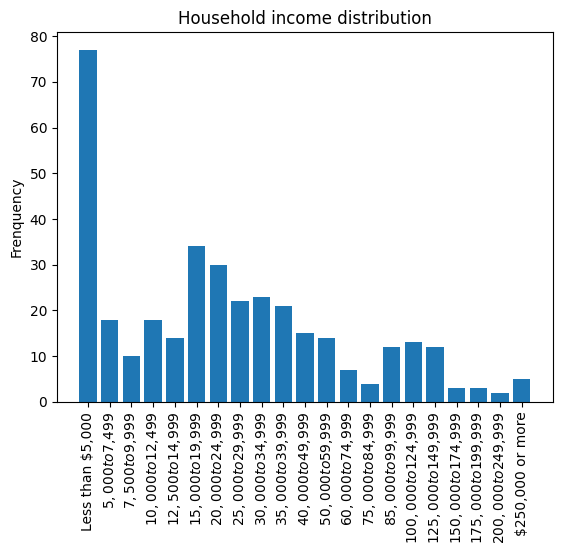

In [ ]:
counts = df['PPINCIMP'].value_counts().sort_index()
counts = counts.rename({1:'Less than $5,000', 2:'$5,000 to $7,499',3:'$7,500 to $9,999', 4:'$10,000 to $12,499',5:'$12,500 to $14,999',
                        6:'$15,000 to $19,999',7:'$20,000 to $24,999',8:'$25,000 to $29,999', 9:'$30,000 to $34,999', 10:'$35,000 to $39,999',
                       11:'$40,000 to $49,999',12:' $50,000 to $59,999',13:'$60,000 to $74,999', 14:'$75,000 to $84,999',15:'$85,000 to $99,999',
                       16:'$100,000 to $124,999',17:'$125,000 to $149,999',18:'$150,000 to $174,999',19:'$175,000 to $199,999',20:'$200,000 to $249,999',21:'$250,000 or more'})
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 90)
plt.title('Household income distribution')
plt.ylabel('Frenquency')
plt.show()

In [ ]:
#drop the redundant data and create a new dataset for further analysis
data = df[['Q29','Q34','Q35','Q35C','Q35B','Q21','Q70_5','Q102','Q102C_3','Q102C_9','Q12_1','Q12_2','Q37A','Q37B','PPETHM','PPGENDER','PPINCIMP']]

In [ ]:
# create a t-SNE object and fit it to the data
tsne = TSNE(n_components=3, perplexity=20)
reduced_data = tsne.fit_transform(data)

#### Previous Attempts

In [ ]:
data

,Q29,Q34,Q35,Q35C,Q35B,Q21,Q70_5,Q102,Q102C_3,Q102C_9,Q12_1,Q12_2,Q37A,Q37B,PPETHM,PPGENDER,PPINCIMP
0,3,2,2,-2,-2,3,2,4,3,3,2,2,-2,-2,1,2,17
1,2,2,2,-2,-2,3,2,1,2,3,2,2,-2,-2,1,1,18
2,2,1,1,-2,-2,3,1,4,5,5,2,2,-2,-2,1,2,10
3,1,2,2,-2,-2,3,2,2,2,2,2,2,-2,-2,1,2,21
4,1,2,2,-2,-2,3,2,2,3,3,2,2,-2,-2,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,3,1,2,1,-2,2,2,2,3,3,2,2,-2,-2,4,2,5
7733,3,2,2,2,-2,3,2,4,4,5,2,2,-2,-2,4,1,9
7734,3,2,1,1,-2,3,2,1,1,2,2,2,-2,-2,4,1,10
7735,3,2,2,2,-2,3,2,4,5,5,2,2,-2,-2,2,1,6


Optimal k: 9
Total distance: 1145275.0


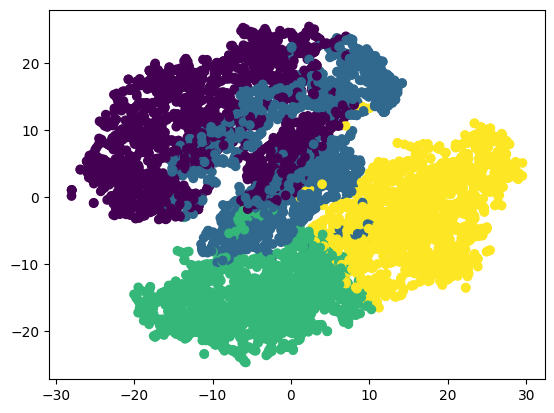

In [ ]:

# calculate the silhouette score for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    silhouette_scores.append(score)

# find the optimal number of clusters based on the silhouette score
optimal_k = np.argmax(silhouette_scores) + 2
print('Optimal k:', optimal_k)

# fit k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(reduced_data)
total_distance = kmeans.inertia_
print('Total distance:', total_distance)

# plot the reduced data with colors representing the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()

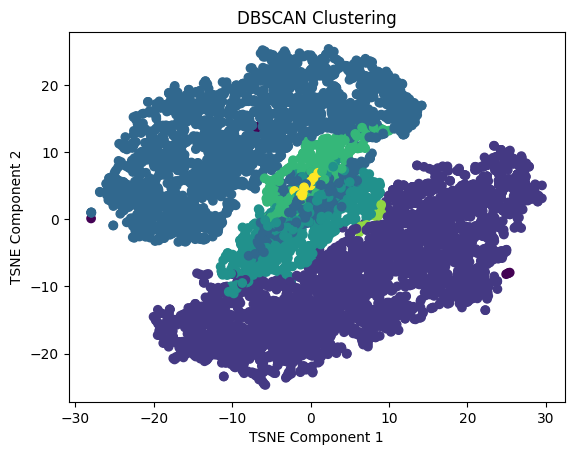

In [ ]:

# perform DBSCAN clustering on the reduced data
dbscan = DBSCAN(eps=3, min_samples=10 )
labels = dbscan.fit_predict(reduced_data)

# plot the data points colored by their cluster labels
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels)
plt.title("DBSCAN Clustering")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()

#### Solution

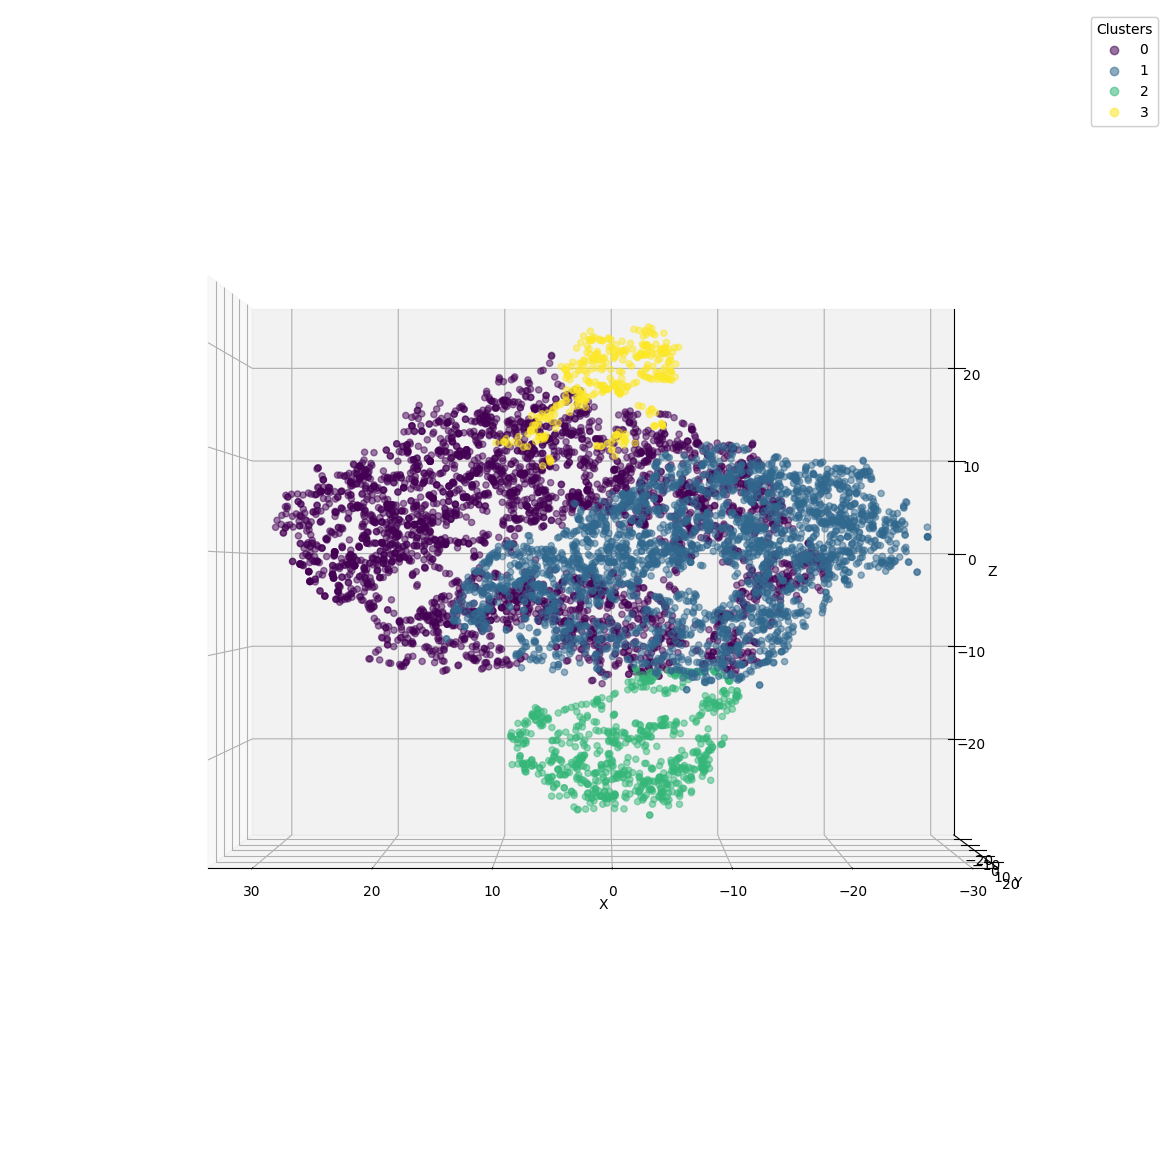

In [ ]:
# perform DBSCAN clustering on the reduced data

from mpl_toolkits.mplot3d import Axes3D
import IPython


dbscan = DBSCAN(eps=4, min_samples=10)
clusters = dbscan.fit_predict(reduced_data)

# visualize the clusters in 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], s=20, c=clusters, cmap='viridis', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_title('DBSCAN Clustering with 3D Data')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")

ax.add_artist(legend1)
#ax.view_init(elev=90, azim=-90, roll=None)#XY
ax.view_init(elev=0, azim=90, roll=None)#XZ
#ax.view_init(elev=0, azim=180, roll=None)#YZ
#ax.view_init(elev=180, azim=270, roll=180)#-XY
#ax.view_init(elev=180, azim=45, roll=180)#-XY
plt.show()

In [ ]:
# combine data with labels
data_l = data.copy()
data_l['label'] = clusters
Group_0 = data_l[data_l['label']==0]
Group_1 = data_l[data_l['label']==1]
Group_2 = data_l[data_l['label']==2]
Group_3 = data_l[data_l['label']==3]

In [ ]:
# Create a dictionary of the 5 data with their names as keys
data_dict = {'Group_0': Group_0, 'Group_1': Group_1, 'Group_2': Group_2, 'Group_3': Group_3}

# Create an empty dataframe with the column names from the first data, plus two extra columns
df_stats = pd.DataFrame(columns=list(Group_0.columns)+['size'])

# Loop through the dictionary and compute the mode for each column, and add size and other_column values
for key, value in data_dict.items():
    df_stats.loc[key] = list(value.mode().iloc[0]) + [value.shape[0]]

# Display the resulting dataframe
df_stats

,Q29,Q34,Q35,Q35C,Q35B,Q21,Q70_5,Q102,Q102C_3,Q102C_9,Q12_1,Q12_2,Q37A,Q37B,PPETHM,PPGENDER,PPINCIMP,label,size
Group_0,3,2,2,-2,-2,3,2,1,2,3,2,2,-2,-2,1,1,16,0,3815
Group_1,2,2,2,-2,-2,3,2,1,2,3,2,2,2,-2,1,2,1,1,2831
Group_2,3,2,2,2,-2,3,2,2,2,3,2,2,-2,-2,1,1,11,2,734
Group_3,3,2,2,-2,-2,3,2,2,2,3,2,2,1,2,4,2,1,3,357


**Q29:**
Do you currently have a health condition that has lasted for a year or more or is expected to last for a year or more? 
* (2: Yes, more than 1 condition; 3: No)
* Only Group 1, which is mostly consisted of low-income, female, and White American, has 2 as the most answer to this question.

**Q35C:**
Since the coronavirus outbreak began, have any of the children under 6 who are living with you missed a well-child check-up, that is, a general check-up when they were not sick or injured?
* (-2: not answered; 2: No)
* Only Group 2, which is mostly consisted of male, avobe-average-income, and white, replied 2 the most.

**Q102:**
If a vaccine that protected you from the coronavirus was available for free to everyone who wanted it, how likely would you be to get it?
* (1: definitely get it; 2: probably get it)
* Group 0 and 1 mostly said 1; Group 2 and 3 mostly said 2, where group 0 and 1 are mostly white American, and group 2 and 3 have more hispanic

**Q37A:**
Are you on temporary layoff from a job?
* (-1: not answered; 1: Yes, 2: No)
* Group 0 and 2, which are mostly consisted of higher than average income male, mostly did not answer this question.
* Group 1, which is mostly consisted of low income female and white, mostly said no.
* Group 3, which is also mostly consisted of low income female, but most are hispanic, but having a smaller size than Group 1, mostly said Yes.

**Q37B:**
Has your employer either given you a date to return to work or indicated you will be recalled to work within the next 6 months?
* (-2: not answered; 2: No)
* Group 0, 1 and 2 mostly did not answer to this question, which are all White Americans.
* However, Group 3, which is mostly consisted of low income female and hispanic, said No. 

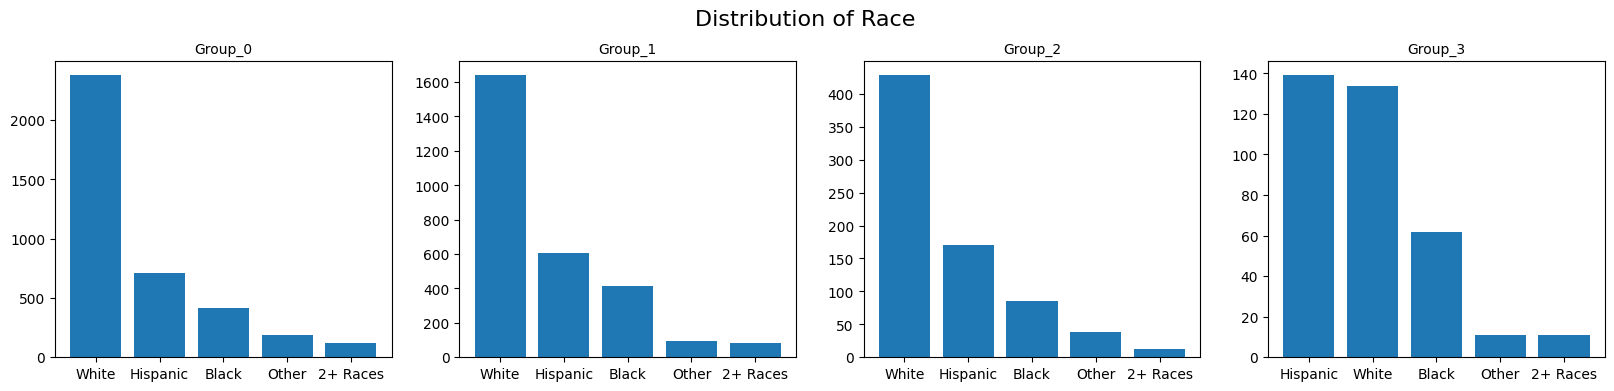

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(20, 4))
race_dict = {1:'White', 2:'Black', 3:'Other',4: 'Hispanic', 5:'2+ Races'}

axs[0].bar(Group_0['PPETHM'].value_counts().rename(race_dict).index, Group_0['PPETHM'].value_counts().values)
axs[0].set_title('Group_0', fontsize=10)
axs[1].bar(Group_1['PPETHM'].value_counts().rename(race_dict).index, Group_1['PPETHM'].value_counts().values)
axs[1].set_title('Group_1', fontsize=10)
axs[2].bar(Group_2['PPETHM'].value_counts().rename(race_dict).index, Group_2['PPETHM'].value_counts().values)
axs[2].set_title('Group_2', fontsize=10)
axs[3].bar(Group_3['PPETHM'].value_counts().rename(race_dict).index, Group_3['PPETHM'].value_counts().values)
axs[3].set_title('Group_3', fontsize=10)
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Race', fontsize=16)
plt.show()

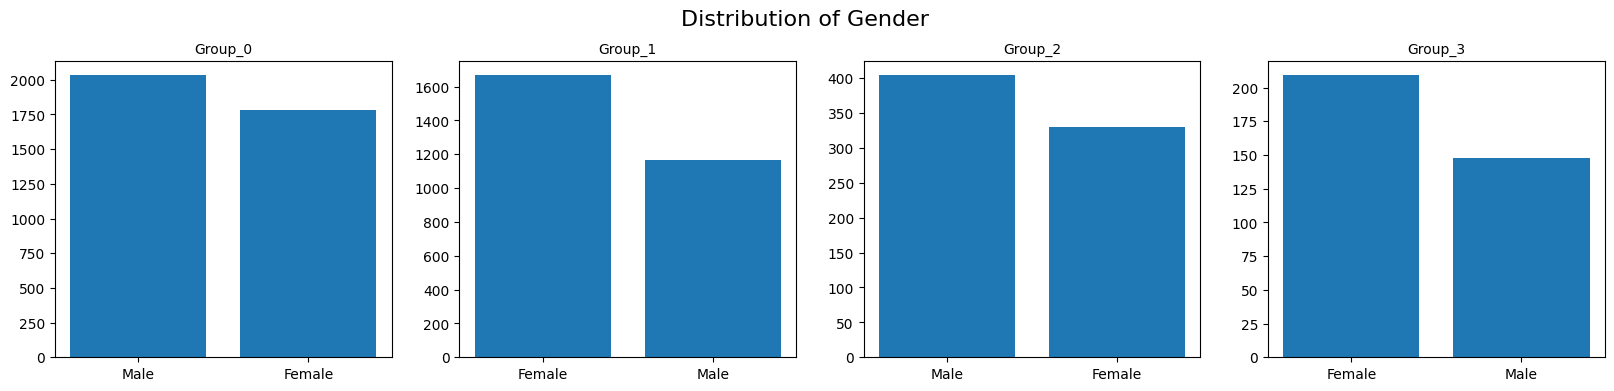

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(20, 4))
gender_dict = {1:'Male', 2:'Female'}

axs[0].bar(Group_0['PPGENDER'].value_counts().rename(gender_dict).index, Group_0['PPGENDER'].value_counts().values)
axs[0].set_title('Group_0', fontsize=10)
axs[1].bar(Group_1['PPGENDER'].value_counts().rename(gender_dict).index, Group_1['PPGENDER'].value_counts().values)
axs[1].set_title('Group_1', fontsize=10)
axs[2].bar(Group_2['PPGENDER'].value_counts().rename(gender_dict).index, Group_2['PPGENDER'].value_counts().values)
axs[2].set_title('Group_2', fontsize=10)
axs[3].bar(Group_3['PPGENDER'].value_counts().rename(gender_dict).index, Group_3['PPGENDER'].value_counts().values)
axs[3].set_title('Group_3', fontsize=10)
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Gender', fontsize=16)
plt.show()

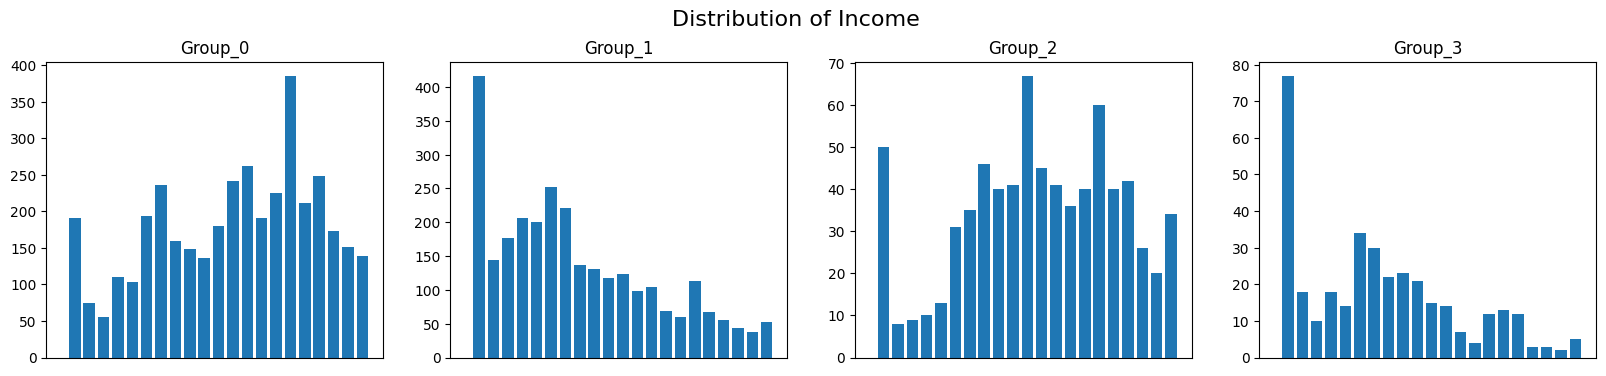

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(20, 4))

data_collection = [Group_0, Group_1, Group_2, Group_3]
data_name = ['Group_0', 'Group_1', 'Group_2', 'Group_3']

for i in range(4):
    df = data_collection[i]
    axs[i].bar(df['PPINCIMP'].value_counts().index, df['PPINCIMP'].value_counts().values)
    axs[i].set_title(data_name[i], fontsize=12)

for ax in axs:
    ax.set_xticks(range(-1, 4))
    ax.axes.xaxis.set_visible(False)

fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Income', fontsize=16)

plt.show()

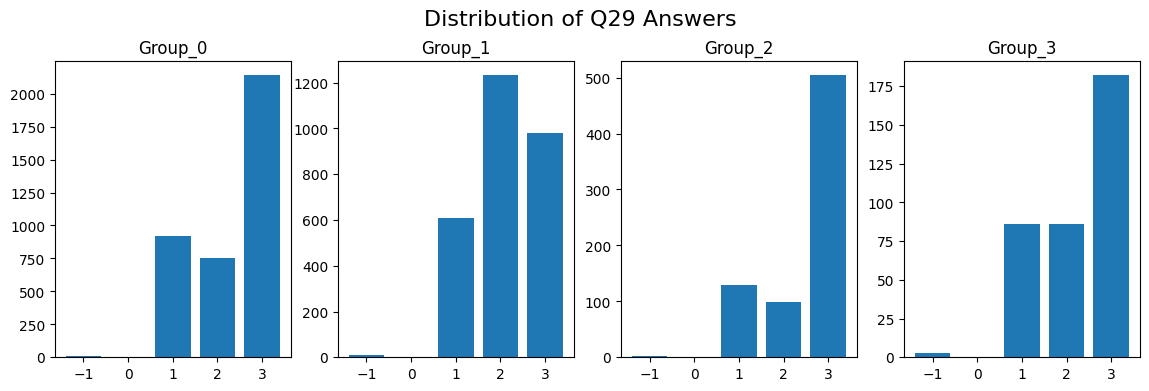

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(14, 4))

data_collection = [Group_0, Group_1, Group_2, Group_3]
data_name = ['Group_0', 'Group_1', 'Group_2', 'Group_3']

for i in range(4):
    df = data_collection[i]
    axs[i].bar(df['Q29'].value_counts().index, df['Q29'].value_counts().values)
    axs[i].set_title(data_name[i], fontsize=12)

for ax in axs:
    ax.set_xticks(range(-1, 4))
    
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Q29 Answers', fontsize=16)
plt.show()

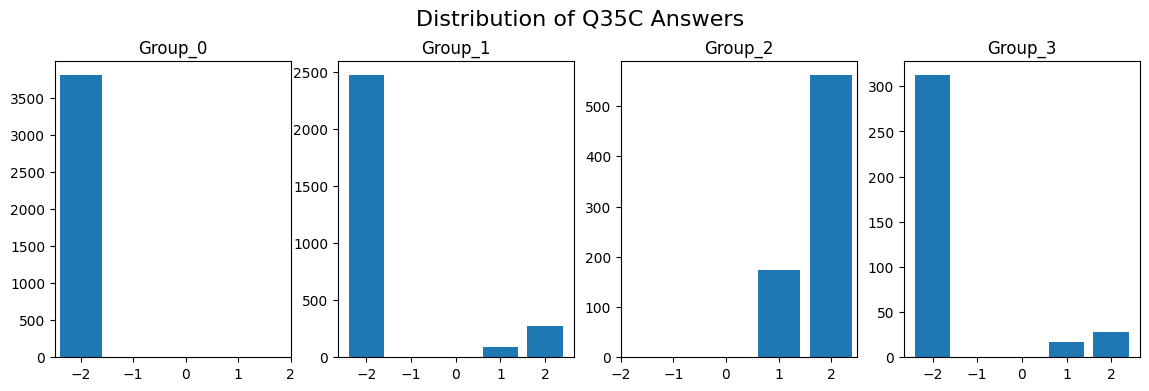

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(14, 4))

data_collection = [Group_0, Group_1, Group_2, Group_3]
data_name = ['Group_0', 'Group_1', 'Group_2', 'Group_3']

for i in range(4):
    df = data_collection[i]
    axs[i].bar(df['Q35C'].value_counts().index, df['Q35C'].value_counts().values)
    axs[i].set_title(data_name[i], fontsize=12)

for ax in axs:
    ax.set_xticks(range(-2, 3))
    
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Q35C Answers', fontsize=16)
plt.show()

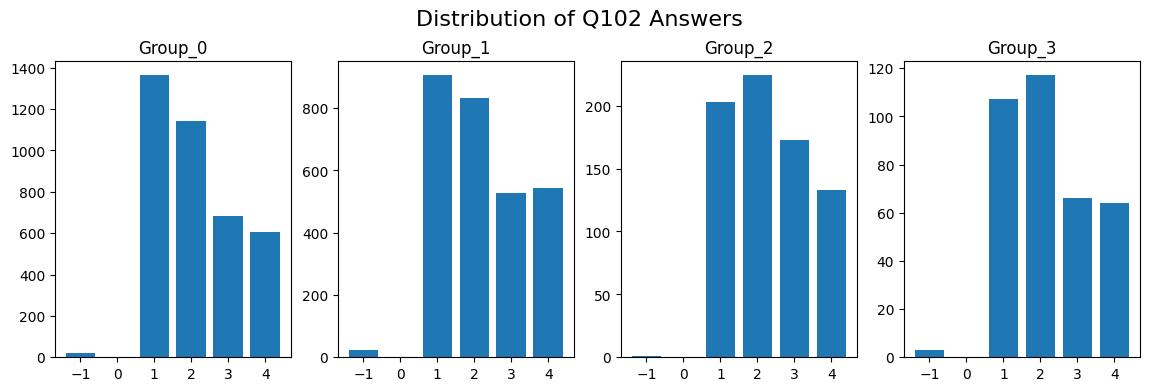

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(14, 4))

data_collection = [Group_0, Group_1, Group_2, Group_3]
data_name = ['Group_0', 'Group_1', 'Group_2', 'Group_3']

for i in range(4):
    df = data_collection[i]
    axs[i].bar(df['Q102'].value_counts().index, df['Q102'].value_counts().values)
    axs[i].set_title(data_name[i], fontsize=12)

for ax in axs:
    ax.set_xticks(range(-1, 5))
    
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Q102 Answers', fontsize=16)
plt.show()

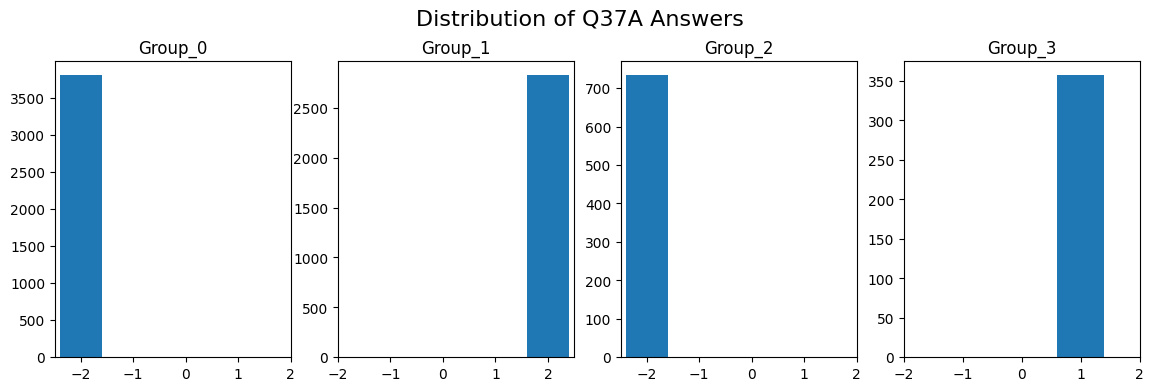

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(14, 4))

data_collection = [Group_0, Group_1, Group_2, Group_3]
data_name = ['Group_0', 'Group_1', 'Group_2', 'Group_3']

for i in range(4):
    df = data_collection[i]
    axs[i].bar(df['Q37A'].value_counts().index, df['Q37A'].value_counts().values)
    axs[i].set_title(data_name[i], fontsize=12)

for ax in axs:
    ax.set_xticks(range(-2, 3))
    
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Q37A Answers', fontsize=16)
plt.show()

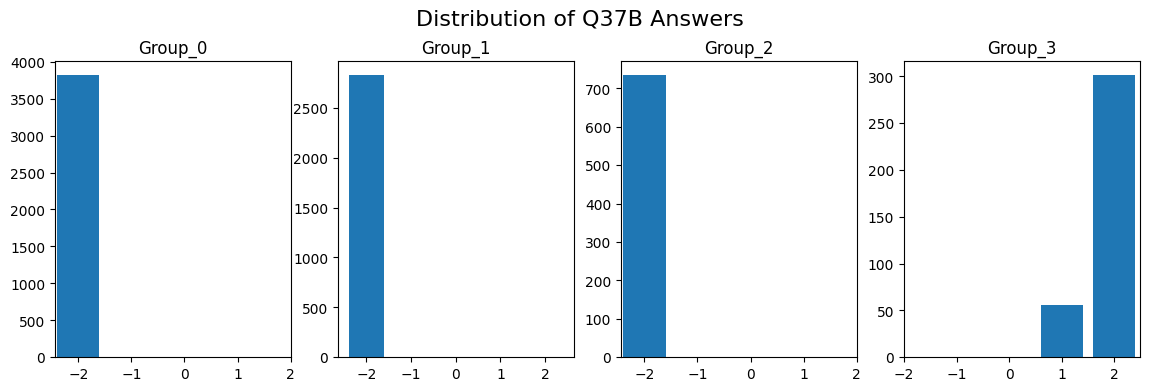

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 4, figsize=(14, 4))

data_collection = [Group_0, Group_1, Group_2, Group_3]
data_name = ['Group_0', 'Group_1', 'Group_2', 'Group_3']

for i in range(4):
    df = data_collection[i]
    axs[i].bar(df['Q37B'].value_counts().index, df['Q37B'].value_counts().values)
    axs[i].set_title(data_name[i], fontsize=12)

for ax in axs:
    ax.set_xticks(range(-2, 3))
    
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of Q37B Answers', fontsize=16)
plt.show()